"""<br>
@Author: Prayag Bhoir<br>
@Date: 08-10-2024<br>
@Last Modified by: Prayag Bhoir<br>
@Last Modified time: 08-10-2024<br>
@Title : Python programs on Nural network(DL) Based on bank customer data,predict whether customer will exit (Output variable “Exited”) the bank or not<br>
"""

In [12]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from keras.models import Sequential
from keras.layers import Dense
from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

<h2>Load the dataset </h2>

In [13]:
url = 'https://drive.google.com/uc?id=1aYpqp7vGd1vy76fhP-2IQJywn0BLt3eM'
df = pd.read_csv(url)
#check the data
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [14]:
df.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


<h2>Preprocess the data</h2>

In [16]:
# Drop unnecessary columns
df = df.drop(columns=['RowNumber', 'CustomerId', 'Surname'])

In [17]:
# Label encoding for 'Gender' as its ordinal
le = LabelEncoder()
df['Gender'] = le.fit_transform(df['Gender'])

In [18]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,0,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,0,41,1,83807.86,1,0,1,112542.58,0
2,502,France,0,42,8,159660.80,3,1,0,113931.57,1
3,699,France,0,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,0,43,2,125510.82,1,1,1,79084.10,0


In [19]:
# Use one-hot encoding for 'Geography' (France, Spain, Germany)
df_encoded = pd.get_dummies(df, columns=['Geography'], drop_first=True)

In [20]:
df_encoded.head()

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain
0,619,0,42,2,0.00,1,1,1,101348.88,1,False,False
1,608,0,41,1,83807.86,1,0,1,112542.58,0,False,True
2,502,0,42,8,159660.80,3,1,0,113931.57,1,False,False
3,699,0,39,1,0.00,2,0,0,93826.63,0,False,False
4,850,0,43,2,125510.82,1,1,1,79084.10,0,False,True


In [21]:
# Convert true false to 0/1 - cause its require in Ml
df_encoded = df_encoded.astype(int)

In [22]:
df_encoded.head()

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain
0,619,0,42,2,0,1,1,1,101348,1,0,0
1,608,0,41,1,83807,1,0,1,112542,0,0,1
2,502,0,42,8,159660,3,1,0,113931,1,0,0
3,699,0,39,1,0,2,0,0,93826,0,0,0
4,850,0,43,2,125510,1,1,1,79084,0,0,1


<h2>Check the outliers and correlation</h2>

/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future ve

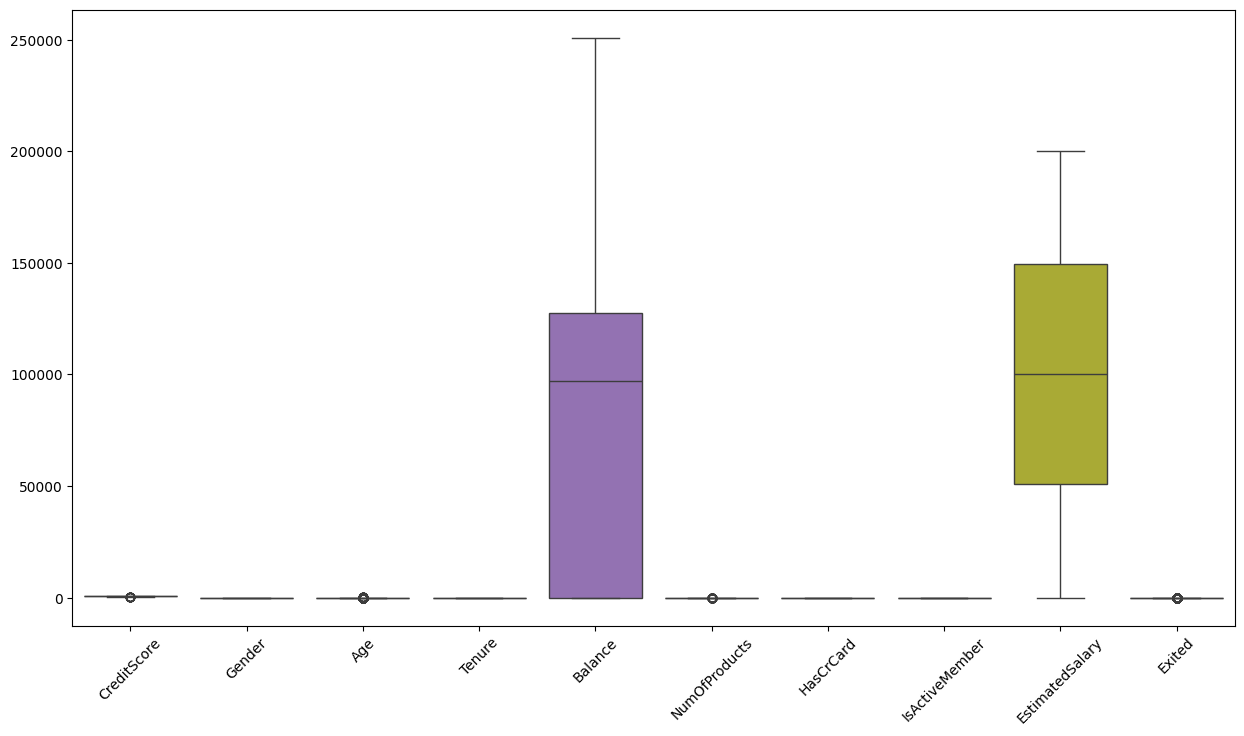

In [23]:
plt.figure(figsize=(15,8))
sns.boxplot(data=df)
plt.xticks(rotation=45)  # Rotate the x-axis labels for better readability
plt.show()

<h2>Observations</h2>
	<li>There are outliers present in the features</li>


<Axes: >

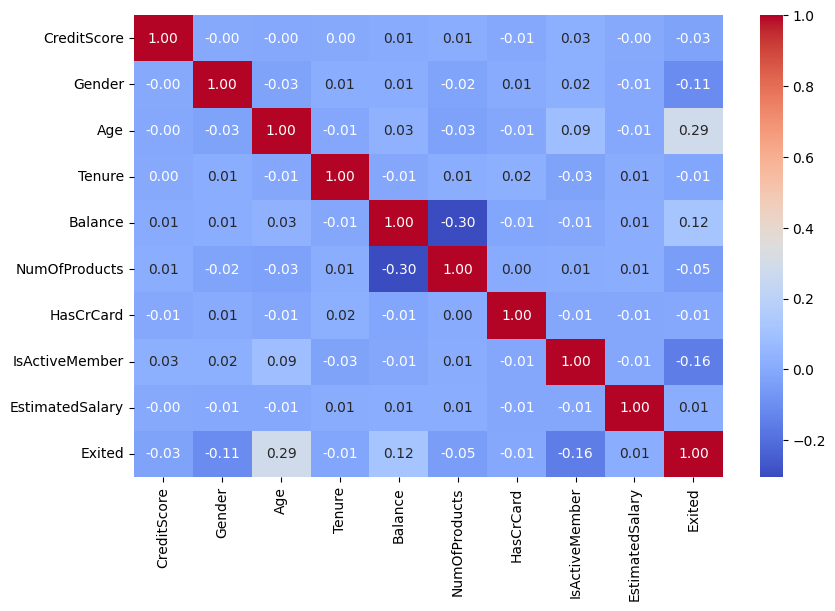

In [24]:
plt.figure(figsize=(9.5,6))
# For numerical value data
sns.heatmap(df[df.describe().columns].corr(), annot=True, fmt='.2f', cmap='coolwarm')

<h2>Observations</h2>
	<li>The orange and redesh shades has high correlation with the y</li>


<h2>Saperate the features</h2>


In [29]:
X = df_encoded.drop('Exited', axis=1)
y = df_encoded['Exited']
#Check the data
X.head(),y.head()

(   CreditScore  Gender  Age  Tenure  Balance  NumOfProducts  HasCrCard  \
 0          619       0   42       2        0              1          1   
 1          608       0   41       1    83807              1          0   
 2          502       0   42       8   159660              3          1   
 3          699       0   39       1        0              2          0   
 4          850       0   43       2   125510              1          1   
 
    IsActiveMember  EstimatedSalary  Geography_Germany  Geography_Spain  
 0               1           101348                  0                0  
 1               1           112542                  0                1  
 2               0           113931                  0                0  
 3               0            93826                  0                0  
 4               1            79084                  0                1  ,
 0    1
 1    0
 2    1
 3    0
 4    0
 Name: Exited, dtype: int64)

<h2>Split the dataset into training and testing</h2>


In [30]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [31]:
display(X_test)
display(y_test)

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_Germany,Geography_Spain
6252,596,1,32,3,96709,2,0,0,41788,1,0
4684,623,1,43,1,0,2,1,1,146379,0,0
1731,601,0,44,4,0,2,1,0,58561,0,1
4742,506,1,59,8,119152,2,1,1,170679,1,0
4521,560,0,27,7,124995,1,1,1,114669,0,1
...,...,...,...,...,...,...,...,...,...,...,...
6412,602,0,53,5,98268,1,0,1,45038,1,0
8285,609,1,25,10,0,1,0,1,109895,0,0
7853,730,0,47,7,0,1,1,0,33373,0,0
1095,692,1,29,4,0,1,1,0,76755,0,0


,Exited
6252,0
4684,0
1731,0
4742,0
4521,0
...,...
6412,1
8285,0
7853,1
1095,1


<h2>Build the model</h2>

In [38]:
model = Sequential()
model.add(Dense(units=1, activation='sigmoid', input_dim=X_train.shape[1]))
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.fit(X_train, y_train, epochs=100, batch_size=10)

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/100
800/800 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.4501 - loss: 16516.8594
Epoch 2/100
800/800 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.6514 - loss: 242.9234
Epoch 3/100
800/800 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.6853 - loss: 16.2430
Epoch 4/100
800/800 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.6590 - loss: 12.6287
Epoch 5/100
800/800 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.6713 - loss: 15.7519
Epoch 6/100
800/800 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.6897 - loss: 13.0970
Epoch 7/100
800/800 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.6840 - loss: 13.1840
Epoch 8/100
800/800 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.6686 - loss: 12.1236
Epoch 9/100
800/800 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.6674 - loss: 15.9569
Epoch 10/100
800/800 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.6685 - loss: 11.4206
Epoch 11/100
800/800 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.6707 - loss: 11.6094
Epoch 12/100
800/800 ━━━━━

In [45]:
y_pred = model.predict(X_test)
# Step 8: Convert probabilities to binary outcomes (1 for Exited, 0 for Not Exited)
y_pred = (y_pred > 0.5).astype(int)


63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step


<h2>Evaluating the model</h2>

In [46]:
loss, accuracy = model.evaluate(X_test, y_test)
cm = confusion_matrix(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7661 - loss: 3.1360


In [47]:
print(f'Accuracy: {accuracy*100:.2f}%')
print("Confusion Matrix:\n", cm)
print("Accuracy:", accuracy)

Accuracy: 78.80%
Confusion Matrix:
 [[1450  157]
 [ 267  126]]
Accuracy: 0.788


<h2>Check the prediction<h2>

In [43]:
X_test.iloc[0:1,:]

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_Germany,Geography_Spain
6252,596,1,32,3,96709,2,0,0,41788,1,0


In [44]:
# Predict whether the client will subscribe to the term deposit
prediction = model.predict(X_test.iloc[0:1,:])

# Since it's a binary classification, convert the probability to a binary outcome
predicted_label = (prediction > 0.5).astype(int)

if predicted_label == 1:
    print("Predicted: Yes, the client will Exited")
else:
    print("Predicted: No, the client will not Exited")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
Predicted: No, the client will not Exited


<h2>Observations</h2>
	<li>The prediction is correct</li>
